In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PFSMG as pfsmg
import functions as func
import generate_synthetic_data as gen

# Handle Accuracy vs Disparate Impact In binary case

Deal with the case of binary-valued sensitive attribute--Gender using synthetic dataset.

Please refer to our paper **Accuracy and Fairness Trade-offs in Machine Learning: AStochastic Multi-Objective Approach** for more details. 

**Dataset:**
- Data generation process is described in Section 4.1 of the [paper](https://arxiv.org/pdf/2008.01132.pdf).
- For convenience, we will test on a dataset in the txt file `data/testData_seed6600451_param5.txt`.
- Note that the prediction label is $\{+1, -1\}$ in our function formulation and implementation. 

**Bi-objective problem:** Decision variables are $x = (c, b)$
- First objective: minimize regularized logistic regression. 
    - $\min~ f_1(c, b) \;=\; \tfrac{1}{N}\sum_{j=1}^N \text{log}(1+\text{exp}(-y_j(c^\top z_j + b)))$
- Second objective: minimize disparate impact (approximated by covariance metrics). 
    - $\min~ f_2^\text{DI}(c, b) \;=\; \left(\frac{1}{N}\sum_{j=1}^N (a_j - \bar{a})(c^\top z_j + b)\right)^2$

Please refer to our paper **Accuracy and Fairness Trade-offs in Machine Learning: AStochastic Multi-Objective Approach** for more details. 



In [2]:
# differnt random seed to generate 
SEED = 6600451
# param will control correlation between two groups, in the paper, we use range from 1.2 to 8.2 with step 0.35
param = 5.05 
# generate random datas and store in txt file for later use 
# _ = gen.generate_synthetic_data(SEED, param) ## uncomment this line if the data file is missing

In [3]:
prob = func.Fairness_LogRe('data/testData_seed%s_param%s.txt'%(SEED, param), 'test_binary_seed%s_param%s'%(SEED, param), 3)
run = pfsmg.Main_SMG(prob)

## key parameters
run.max_iter = 1000
run.max_len_pareto_front = 1500
    
run.point_per_iteration = 1
run.num_steps_per_point = 1
run.stepsize = 0.3
run.step_scheme = 0 # constant step size

run.batch1_init = 5
run.batch1_factor = 1.01
run.batch1_max = 1.0/3
run.batch2_init = 200
run.batch2_factor = 1.01
run.batch2_max = 1.0/3
run.alpha = 1.0/3
run.discount_iter_interval = 80

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.0 # 0.4
run.f1_explore_interval = 6
run.f2_explore_interval = 4
run.f1_explore_pt_per_iter = 0#2
run.f2_explore_pt_per_iter = 0#1
run.f1_num_steps_per_point = 1
run.f2_num_steps_per_point = 1
run.num_max_hole_points = 3
run.max_hole_explore_pt_per_iter = 1
run.max_hole_num_steps_per_point = 1
run.max_hole_only = True
run.dense_threshold = 1.0/1200

Sensitive feature index:  3
#Training data size:  2000
Number of positive ones:  1102.0


### The following PF-SMG function is designed to iteratively update fronts
- The algorithm may takes several minutes to terminate
- The algorithm will be terminated either max iteration is reached or max number of non-dominated points is obtained. Reduce `run.max_iter` to reduce running time and increase `run.max_len_pareto_front` to improve Pareto front spread. 

In [12]:
f1_arrays7, f2_arrays7, point_arrays7, total_time = run.main_SMG()

time:  0.0101690292358
#Pts:  2  #Iter:  1
time:  0.00292921066284
#Pts:  2  #Iter:  2
time:  0.0046021938324
#Pts:  4  #Iter:  3
time:  0.00585699081421
#Pts:  8  #Iter:  4
time:  0.00883412361145
#Pts:  10  #Iter:  5
time:  0.0131208896637
#Pts:  16  #Iter:  6
time:  0.0132231712341
#Pts:  19  #Iter:  7
time:  0.0118849277496
#Pts:  24  #Iter:  8
time:  0.0140829086304
#Pts:  30  #Iter:  9
time:  0.0156528949738
#Pts:  33  #Iter:  10
time:  0.0138700008392
#Pts:  39  #Iter:  11
time:  0.0143439769745
#Pts:  43  #Iter:  12
time:  0.0168578624725
#Pts:  47  #Iter:  13
time:  0.0168519020081
#Pts:  54  #Iter:  14
time:  0.0186560153961
#Pts:  58  #Iter:  15
time:  0.0209531784058
#Pts:  61  #Iter:  16
time:  0.0194270610809
#Pts:  65  #Iter:  17
time:  0.0192818641663
#Pts:  69  #Iter:  18
time:  0.0174970626831
#Pts:  72  #Iter:  19
time:  0.0174999237061
#Pts:  71  #Iter:  20
time:  0.0183808803558
#Pts:  77  #Iter:  21
time:  0.0188589096069
#Pts:  82  #Iter:  22
time:  0.01658987998

time:  0.0205688476562
#Pts:  284  #Iter:  182
time:  0.0185551643372
#Pts:  284  #Iter:  183
time:  0.0185120105743
#Pts:  284  #Iter:  184
time:  0.0185790061951
#Pts:  286  #Iter:  185
time:  0.0200490951538
#Pts:  286  #Iter:  186
time:  0.0197570323944
#Pts:  286  #Iter:  187
time:  0.0187020301819
#Pts:  286  #Iter:  188
time:  0.0187571048737
#Pts:  286  #Iter:  189
time:  0.0192430019379
#Pts:  288  #Iter:  190
time:  0.020054101944
#Pts:  291  #Iter:  191
time:  0.0216372013092
#Pts:  292  #Iter:  192
time:  0.0187599658966
#Pts:  290  #Iter:  193
time:  0.0198900699615
#Pts:  290  #Iter:  194
time:  0.0201327800751
#Pts:  291  #Iter:  195
time:  0.018670797348
#Pts:  293  #Iter:  196
time:  0.019966840744
#Pts:  293  #Iter:  197
time:  0.0201759338379
#Pts:  293  #Iter:  198
time:  0.0188138484955
#Pts:  295  #Iter:  199
time:  0.0205900669098
#Pts:  297  #Iter:  200
time:  0.0189809799194
#Pts:  297  #Iter:  201
time:  0.022301197052
#Pts:  298  #Iter:  202
time:  0.01993703

time:  0.0253319740295
#Pts:  385  #Iter:  360
time:  0.0237789154053
#Pts:  387  #Iter:  361
time:  0.0227661132812
#Pts:  387  #Iter:  362
time:  0.0222949981689
#Pts:  387  #Iter:  363
time:  0.0222799777985
#Pts:  385  #Iter:  364
time:  0.0222628116608
#Pts:  386  #Iter:  365
time:  0.0236439704895
#Pts:  386  #Iter:  366
time:  0.0222668647766
#Pts:  387  #Iter:  367
time:  0.022381067276
#Pts:  387  #Iter:  368
time:  0.0273649692535
#Pts:  387  #Iter:  369
time:  0.023745059967
#Pts:  387  #Iter:  370
time:  0.0226080417633
#Pts:  387  #Iter:  371
time:  0.0240209102631
#Pts:  388  #Iter:  372
time:  0.0224039554596
#Pts:  389  #Iter:  373
time:  0.0226829051971
#Pts:  390  #Iter:  374
time:  0.022812128067
#Pts:  390  #Iter:  375
time:  0.0227711200714
#Pts:  390  #Iter:  376
time:  0.0229640007019
#Pts:  391  #Iter:  377
time:  0.0281579494476
#Pts:  392  #Iter:  378
time:  0.0234370231628
#Pts:  392  #Iter:  379
time:  0.0235919952393
#Pts:  392  #Iter:  380
time:  0.0229051

time:  0.0306990146637
#Pts:  439  #Iter:  538
time:  0.0274050235748
#Pts:  439  #Iter:  539
time:  0.026153087616
#Pts:  439  #Iter:  540
time:  0.027204990387
#Pts:  439  #Iter:  541
time:  0.0260691642761
#Pts:  439  #Iter:  542
time:  0.0268609523773
#Pts:  439  #Iter:  543
time:  0.0268800258636
#Pts:  439  #Iter:  544
time:  0.0268168449402
#Pts:  440  #Iter:  545
time:  0.0308830738068
#Pts:  439  #Iter:  546
time:  0.0270080566406
#Pts:  439  #Iter:  547
time:  0.0254919528961
#Pts:  439  #Iter:  548
time:  0.0259780883789
#Pts:  440  #Iter:  549
time:  0.0255761146545
#Pts:  441  #Iter:  550
time:  0.0255641937256
#Pts:  442  #Iter:  551
time:  0.0270299911499
#Pts:  443  #Iter:  552
time:  0.025664806366
#Pts:  443  #Iter:  553
time:  0.0323870182037
#Pts:  444  #Iter:  554
time:  0.027773141861
#Pts:  444  #Iter:  555
time:  0.0262360572815
#Pts:  444  #Iter:  556
time:  0.0260620117188
#Pts:  444  #Iter:  557
time:  0.0273668766022
#Pts:  444  #Iter:  558
time:  0.02669000

time:  0.0298311710358
#Pts:  476  #Iter:  718
time:  0.0270879268646
#Pts:  476  #Iter:  719
time:  0.0287761688232
#Pts:  477  #Iter:  720
time:  0.0275819301605
#Pts:  477  #Iter:  721
time:  0.0279979705811
#Pts:  478  #Iter:  722
time:  0.0271198749542
#Pts:  478  #Iter:  723
time:  0.0278568267822
#Pts:  479  #Iter:  724
time:  0.0285758972168
#Pts:  480  #Iter:  725
time:  0.0292589664459
#Pts:  479  #Iter:  726
time:  0.0272960662842
#Pts:  479  #Iter:  727
time:  0.0274338722229
#Pts:  479  #Iter:  728
time:  0.0272409915924
#Pts:  479  #Iter:  729
time:  0.0289030075073
#Pts:  479  #Iter:  730
time:  0.027764081955
#Pts:  479  #Iter:  731
time:  0.0284798145294
#Pts:  479  #Iter:  732
time:  0.0273230075836
#Pts:  479  #Iter:  733
time:  0.0281980037689
#Pts:  479  #Iter:  734
time:  0.0272748470306
#Pts:  479  #Iter:  735
time:  0.0275769233704
#Pts:  479  #Iter:  736
time:  0.0285949707031
#Pts:  479  #Iter:  737
time:  0.0273480415344
#Pts:  479  #Iter:  738
time:  0.02811

time:  0.0311210155487
#Pts:  497  #Iter:  893
time:  0.0280640125275
#Pts:  497  #Iter:  894
time:  0.0287048816681
#Pts:  497  #Iter:  895
time:  0.0284199714661
#Pts:  498  #Iter:  896
time:  0.0286729335785
#Pts:  498  #Iter:  897
time:  0.0281360149384
#Pts:  498  #Iter:  898
time:  0.0293869972229
#Pts:  498  #Iter:  899
time:  0.0303480625153
#Pts:  499  #Iter:  900
time:  0.0282609462738
#Pts:  498  #Iter:  901
time:  0.0295300483704
#Pts:  498  #Iter:  902
time:  0.0299100875854
#Pts:  498  #Iter:  903
time:  0.0292139053345
#Pts:  498  #Iter:  904
time:  0.0281889438629
#Pts:  498  #Iter:  905
time:  0.0295040607452
#Pts:  500  #Iter:  906
time:  0.0316920280457
#Pts:  500  #Iter:  907
time:  0.0282711982727
#Pts:  500  #Iter:  908
time:  0.0289099216461
#Pts:  500  #Iter:  909
time:  0.0281839370728
#Pts:  500  #Iter:  910
time:  0.0299029350281
#Pts:  500  #Iter:  911
time:  0.0283451080322
#Pts:  500  #Iter:  912
time:  0.0281910896301
#Pts:  501  #Iter:  913
time:  0.0315

### Plot the full trade-off information
- pick a certain number of points from Pareto front, evaluate accuracy, disparte impact, TPR, FPR, etc. 
- Take several minutes to process 1500 points

In [13]:
## Compute loss, accuracy, and CV score for points on Pareto front 
M = min(1500, len(f1_arrays7))
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


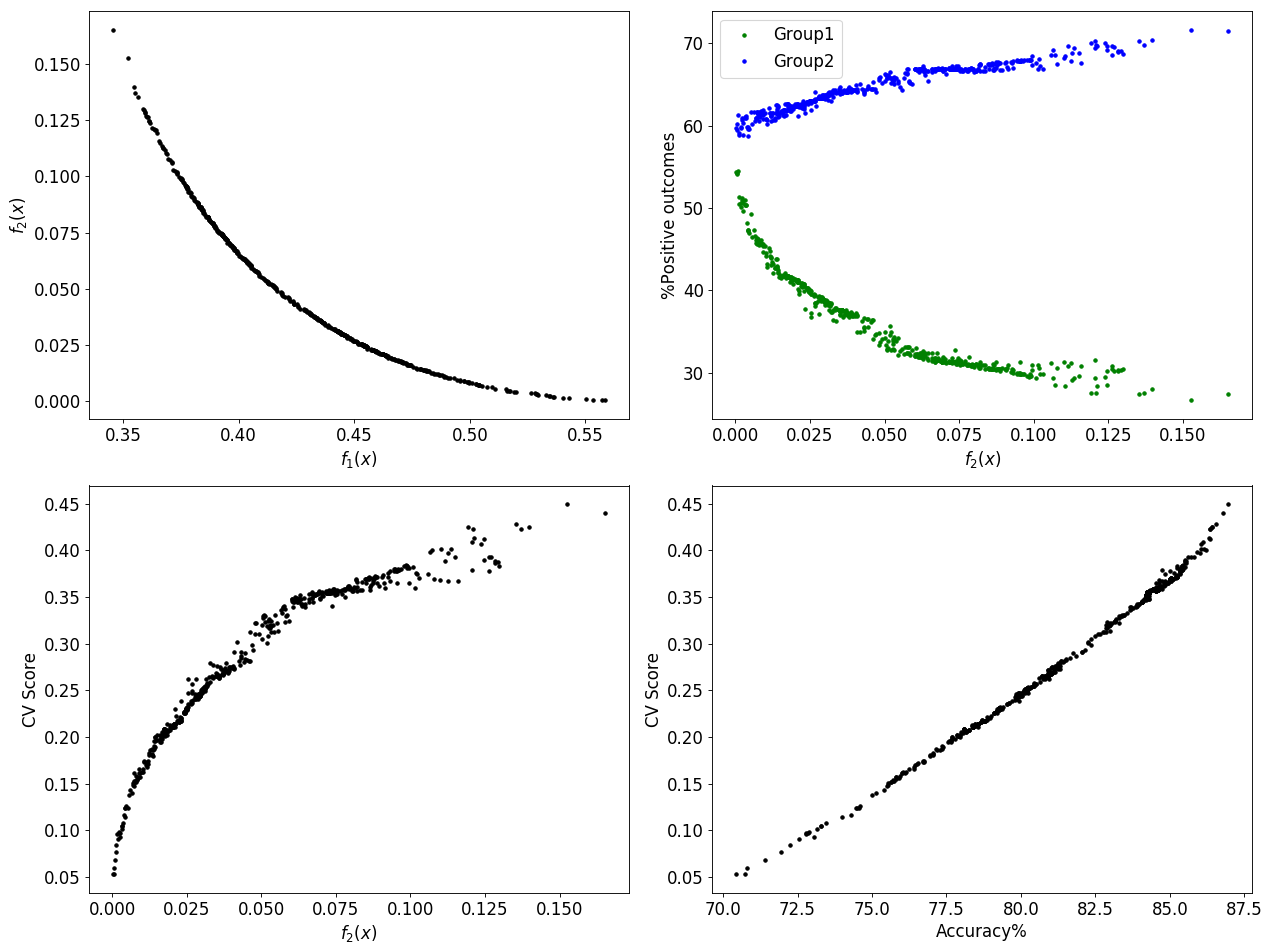

In [14]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_2(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0]*100.0, 'g.', lw=2, label = 'Group1')
ax2.plot(training_obj2, percentage[:, 1]*100.0, 'b.', lw=2, label = 'Group2')
ax2.set_xlabel('$f_2(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize=15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_2(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()
